In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Importing libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [6]:
df = pd.read_csv('/Ecommerce_Sales_Prediction_Dataset.csv')
df.head()

,Date,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend,Units_Sold
0,01-01-2023,Sports,932.80,35.82,Occasional,6780.38,32
1,02-01-2023,Toys,569.48,3.60,Premium,6807.56,16
2,03-01-2023,Home Decor,699.68,3.56,Premium,3793.91,27
3,04-01-2023,Toys,923.27,0.61,Premium,9422.75,29
4,05-01-2023,Toys,710.17,47.83,Premium,1756.83,17


In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# EDA

In [8]:
df.shape

(1000, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              1000 non-null   object 
 1   Product_Category  1000 non-null   object 
 2   Price             1000 non-null   float64
 3   Discount          1000 non-null   float64
 4   Customer_Segment  1000 non-null   object 
 5   Marketing_Spend   1000 non-null   float64
 6   Units_Sold        1000 non-null   int64  
dtypes: float64(3), int64(1), object(3)
memory usage: 54.8+ KB


In [10]:
df.isnull().sum()

,0
Date,0
Product_Category,0
Price,0
Discount,0
Customer_Segment,0
Marketing_Spend,0
Units_Sold,0


In [11]:
df.describe()

,Price,Discount,Marketing_Spend,Units_Sold
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,505.241920,24.919750,4912.830240,29.631000
std,289.791248,14.439951,2840.602656,7.267989
min,14.590000,0.010000,100.300000,5.000000
25%,243.342500,12.995000,2413.020000,24.000000
50%,509.310000,24.965000,4837.245000,30.000000
75%,747.592500,37.562500,7319.675000,34.000000
max,999.420000,49.920000,9995.620000,57.000000


# Data visualization

In [12]:
sns.set_theme(style="whitegrid")



**Price Distribution**: A histogram showing the spread of product prices.


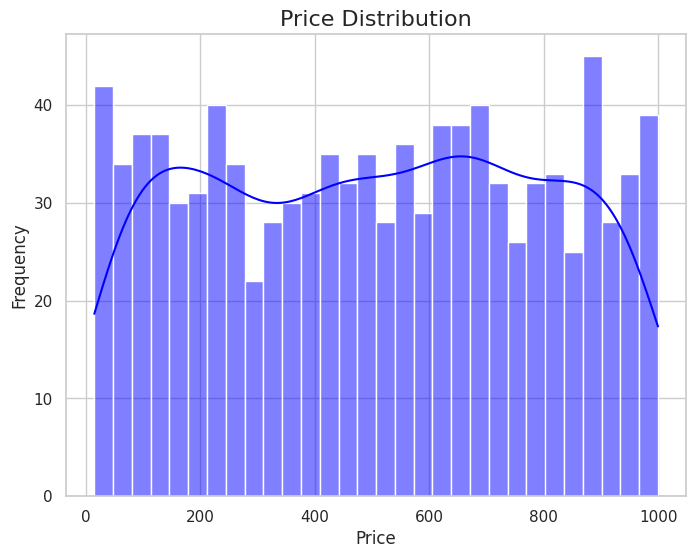

In [13]:
#plotting price distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Price'], kde=True, bins=30, color='blue')
plt.title('Price Distribution', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Discount Distribution**: A histogram indicating how discounts are distributed.


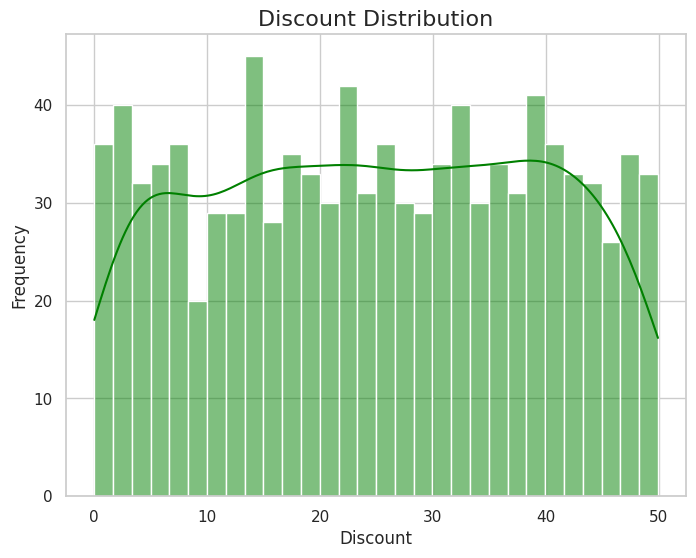

In [14]:
#discount distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Discount'], kde=True, bins=30, color='green')
plt.title('Discount Distribution', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Marketing Spend Distribution**: A histogram showing patterns in marketing investments.


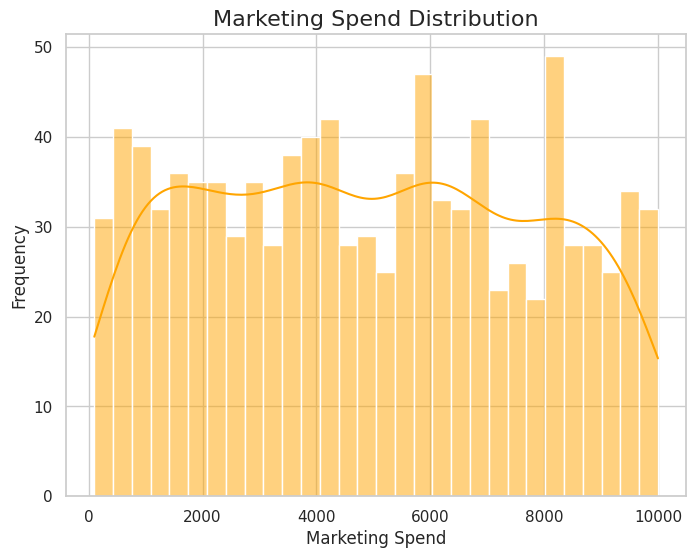

In [15]:
#Marketing Spend Distribution
plt.figure(figsize=(8, 6))
sns.histplot(df['Marketing_Spend'], kde=True, bins=30, color='orange')
plt.title('Marketing Spend Distribution', fontsize=16)
plt.xlabel('Marketing Spend', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()

**Customer Segment Distribution**: A bar plot of customer segments.


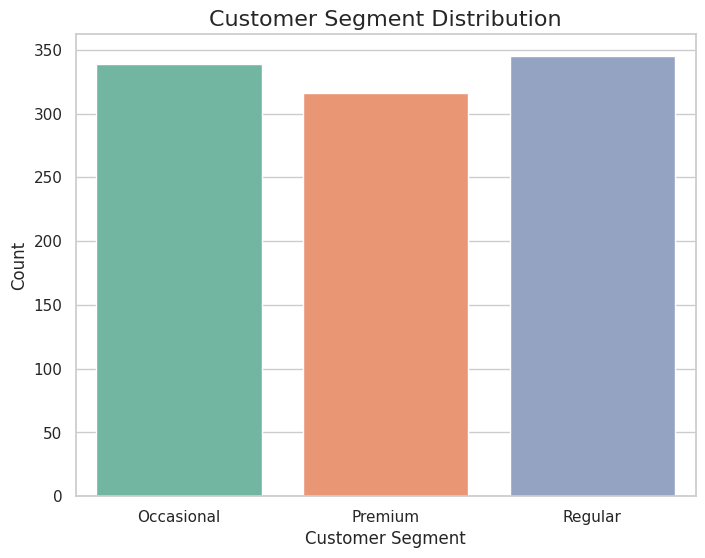

In [16]:
# Customer segment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Customer_Segment', data=df, palette='Set2')
plt.title('Customer Segment Distribution', fontsize=16)
plt.xlabel('Customer Segment', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()

**Price vs. Units Sold**: Scatter plot showing how price affects the number of units sold.


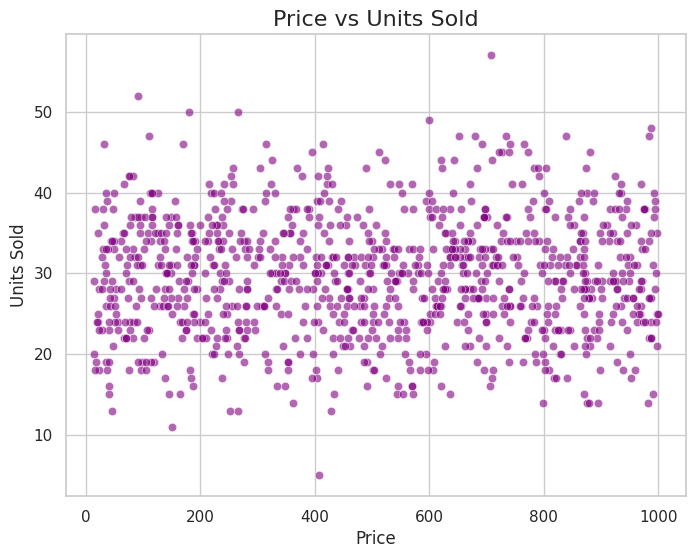

In [17]:
# Price vs Units Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price', y='Units_Sold', data=df, color='purple', alpha=0.6)
plt.title('Price vs Units Sold', fontsize=16)
plt.xlabel('Price', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

**Discount vs. Units Sold**: Scatter plot analyzing the impact of discounts on sales volume.


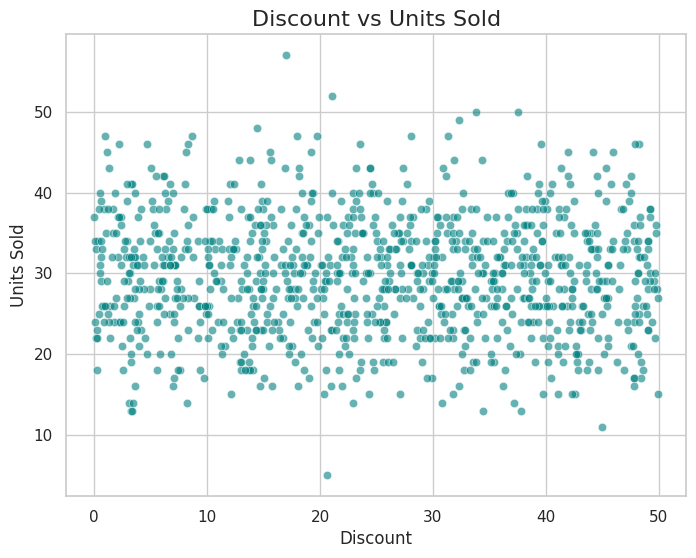

In [18]:
#Discount vs Units Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Discount', y='Units_Sold', data=df, color='teal', alpha=0.6)
plt.title('Discount vs Units Sold', fontsize=16)
plt.xlabel('Discount', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

**Marketing Spend vs. Units Sold**: Scatter plot evaluating marketing investment effectiveness.


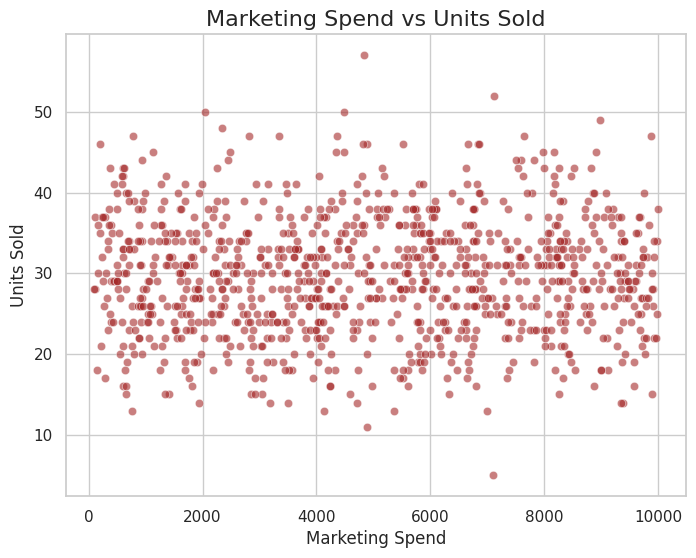

In [19]:
# Marketing Spend vs Units Sold
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Marketing_Spend', y='Units_Sold', data=df, color='brown', alpha=0.6)
plt.title('Marketing Spend vs Units Sold', fontsize=16)
plt.xlabel('Marketing Spend', fontsize=12)
plt.ylabel('Units Sold', fontsize=12)
plt.show()

**Correlation Heatmap**: A heatmap highlighting relationships between numeric features (Price, Discount, Marketing Spend, Units Sold).


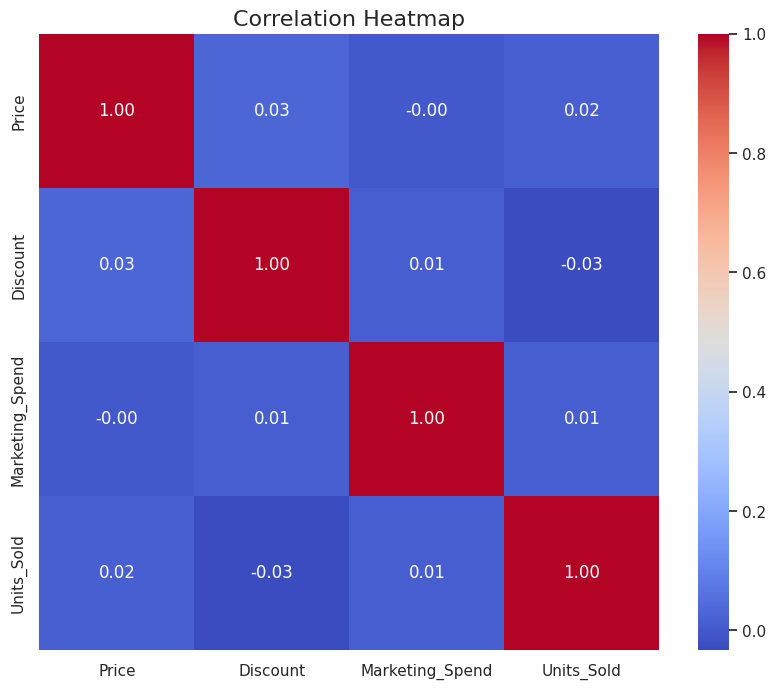

In [20]:
# Correlation Heatmap
plt.figure(figsize=(10, 8))
correlation = df[['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap', fontsize=16)
plt.show()

**pair plot**

<Figure size 1200x1000 with 0 Axes>

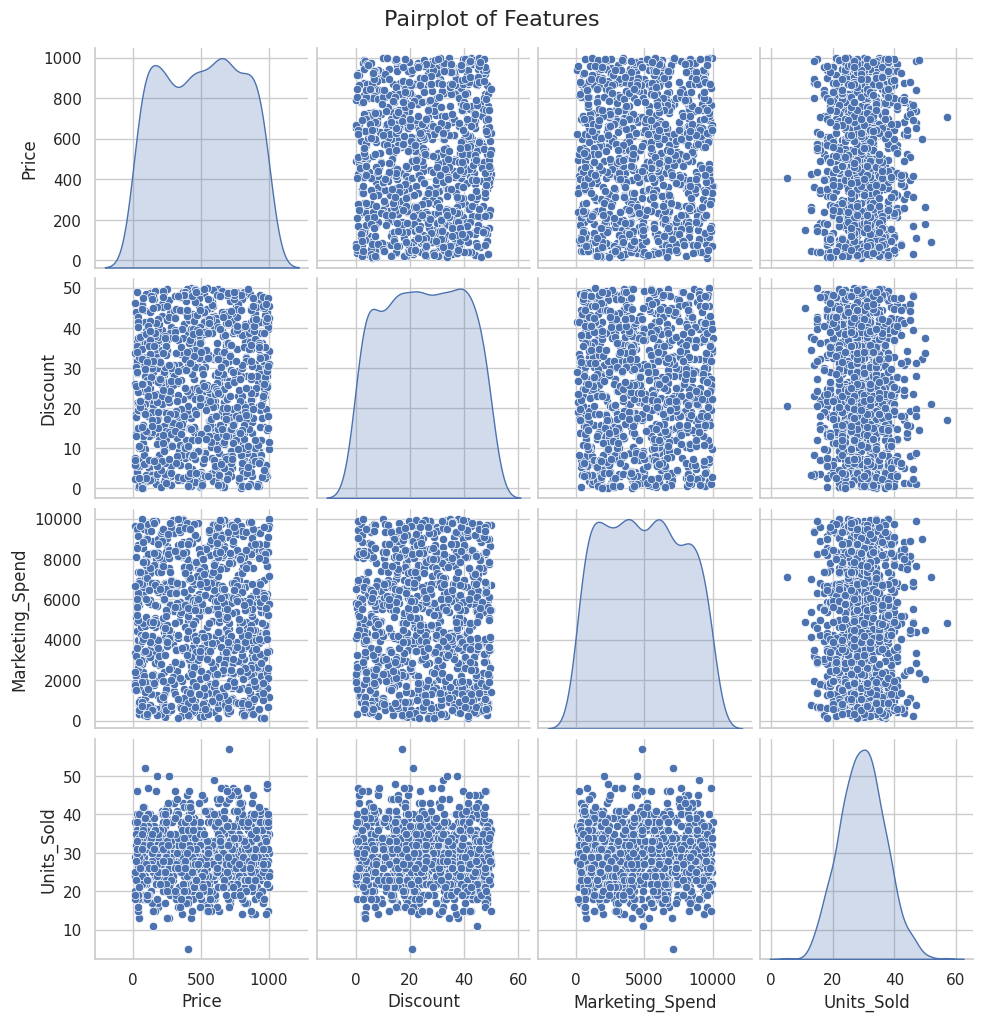

In [21]:
# pair plot
plt.figure(figsize=(12, 10))
sns.pairplot(df[['Price', 'Discount', 'Marketing_Spend', 'Units_Sold']], diag_kind='kde', palette='husl')
plt.suptitle('Pairplot of Features', y=1.02, fontsize=16)
plt.show()

**sales trend over time**

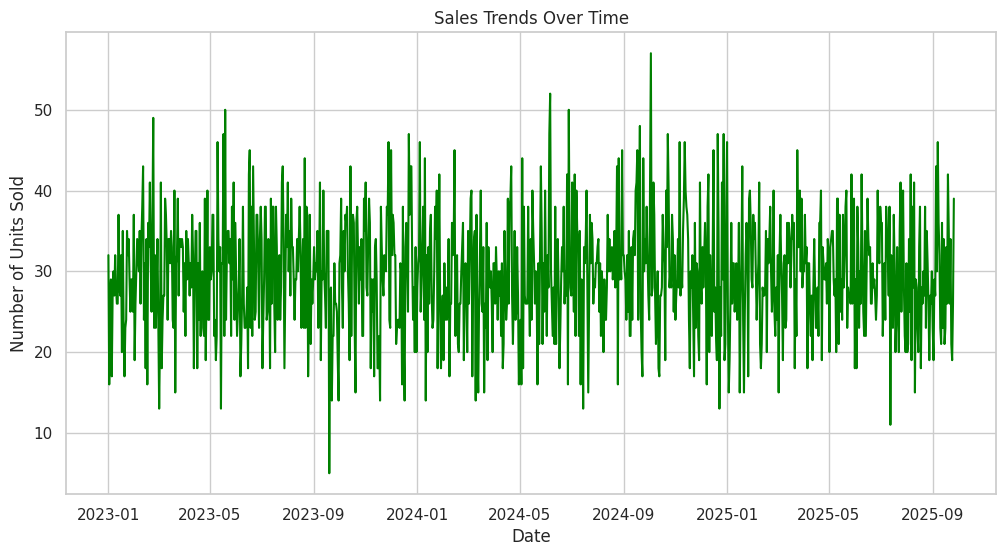

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold',color='green')
plt.title('Sales Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Units Sold')
plt.show()

**distribution of marketing customer segment**

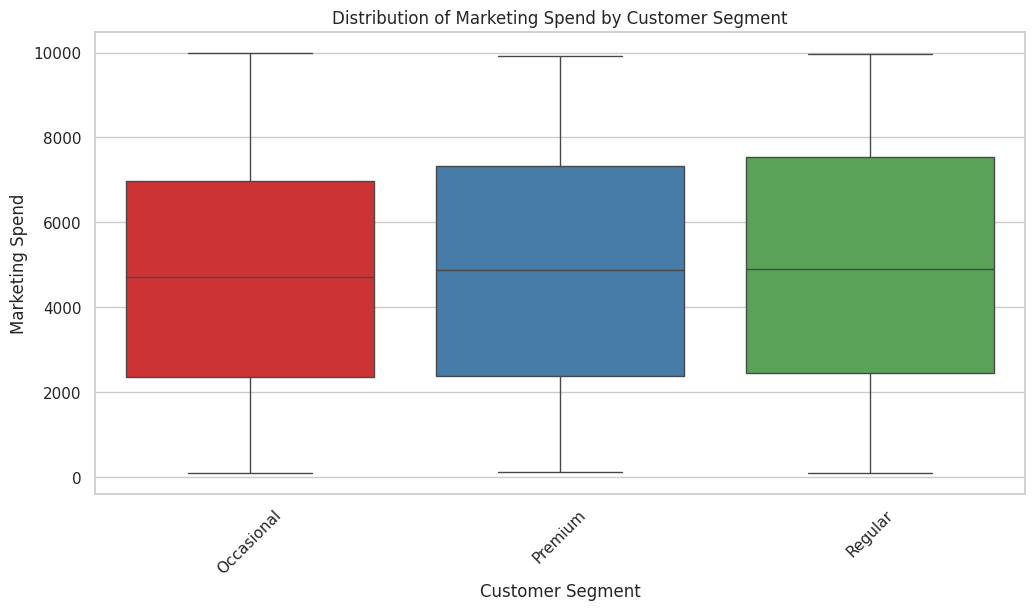

In [23]:
# distribution of marketing customer segment
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Customer_Segment', y='Marketing_Spend', palette = 'Set1')
plt.title('Distribution of Marketing Spend by Customer Segment')
plt.xlabel('Customer Segment')
plt.ylabel('Marketing Spend')
plt.xticks(rotation=45)
plt.show()

**plotting unit sold over time by product category**

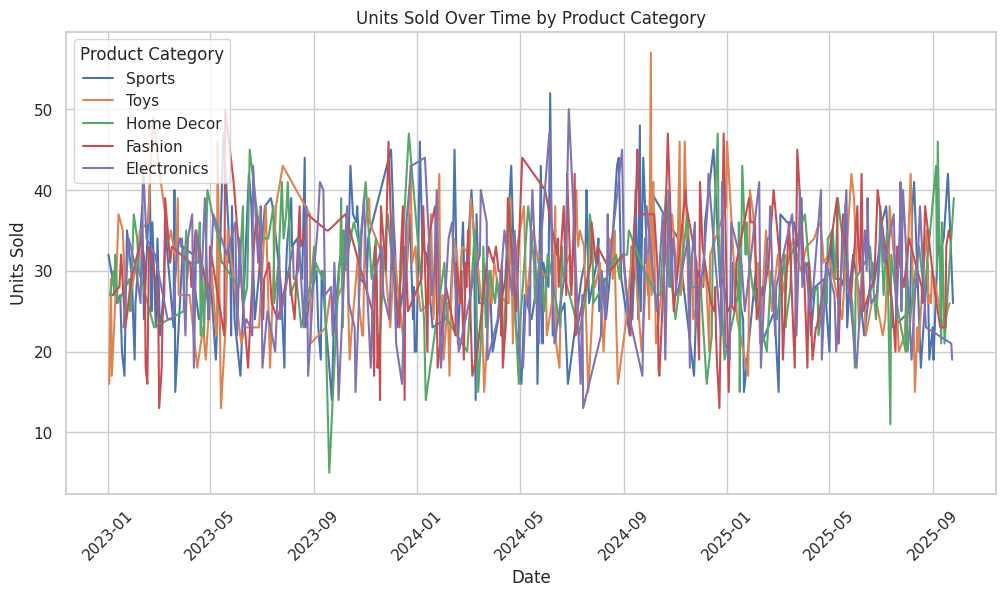

In [24]:
#unit sold over time by product category
plt.figure(figsize=(12, 6))
sns.lineplot(data=df, x='Date', y='Units_Sold', hue='Product_Category',color='coolwarm')
plt.title('Units Sold Over Time by Product Category')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.xticks(rotation=45)
plt.legend(title='Product Category')
plt.show()

# Data splitting

In [25]:
X = df[['Product_Category', 'Price', 'Discount', 'Customer_Segment', 'Marketing_Spend']]
y = df['Units_Sold']

In [26]:
X

,Product_Category,Price,Discount,Customer_Segment,Marketing_Spend
0,Sports,932.80,35.82,Occasional,6780.38
1,Toys,569.48,3.60,Premium,6807.56
2,Home Decor,699.68,3.56,Premium,3793.91
3,Toys,923.27,0.61,Premium,9422.75
4,Toys,710.17,47.83,Premium,1756.83
...,...,...,...,...,...
995,Fashion,740.06,49.06,Regular,1890.83
996,Electronics,517.10,28.48,Premium,8011.66
997,Electronics,683.43,12.98,Occasional,3408.51
998,Sports,51.26,21.85,Occasional,7335.62


In [27]:
y

,Units_Sold
0,32
1,16
2,27
3,29
4,17
...,...
995,34
996,21
997,19
998,26


In [28]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(800, 5) (800,)
(200, 5) (200,)


# Data preprocessing

In [29]:
# Define preprocessing steps
numeric_features = ['Price', 'Discount', 'Marketing_Spend']
categorical_features = ['Product_Category', 'Customer_Segment']

In [30]:
# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(drop='first')

**preprocessing pipeline**

In [31]:
preprocessor = ColumnTransformer(
    transformers = [
        ('num',numeric_transformer,numeric_features),
        ('cat',categorical_transformer,categorical_features)
    ]
)

In [32]:
model = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('regressor',LinearRegression())
])

In [33]:
model.fit(X_train,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Price', 'Discount',
                                                   'Marketing_Spend']),
                                                 ('cat',
                                                  OneHotEncoder(drop='first'),
                                                  ['Product_Category',
                                                   'Customer_Segment'])])),
                ('regressor', LinearRegression())])

In [34]:
y_pred = model.predict(X_test)
mse =  mean_squared_error(y_test,y_pred)
r2 = r2_score(y_test,y_pred)
print(f"Mean squarred error: {mse:.2f}")
print(f"r2 score: {r2:.2f}")

Mean squarred error: 55.99
r2 score: -0.04
